In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\HP\\OneDrive\\Desktop\\ai2\\kaim-week-01\\data\\raw_analyst_ratings.csv')

# Display the first few rows
print(df.head())


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


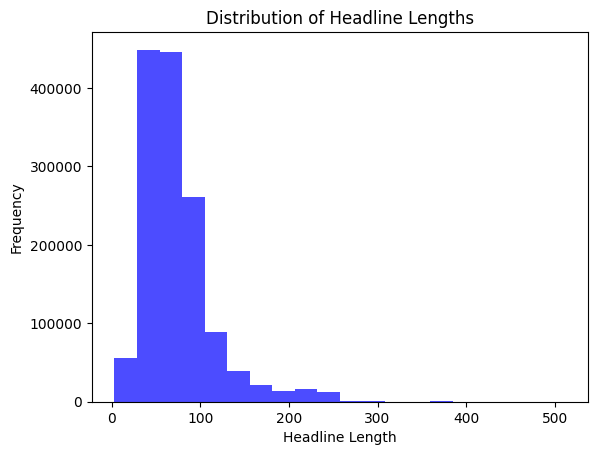

In [8]:
# Calculate headline lengths
df['headline_length'] = df['headline'].apply(len)

# Summary statistics for headline lengths
print("Headline Length Statistics:")
print(df['headline_length'].describe())

# Visualize the distribution of headline lengths
plt.hist(df['headline_length'], bins=20, alpha=0.7, color='blue')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


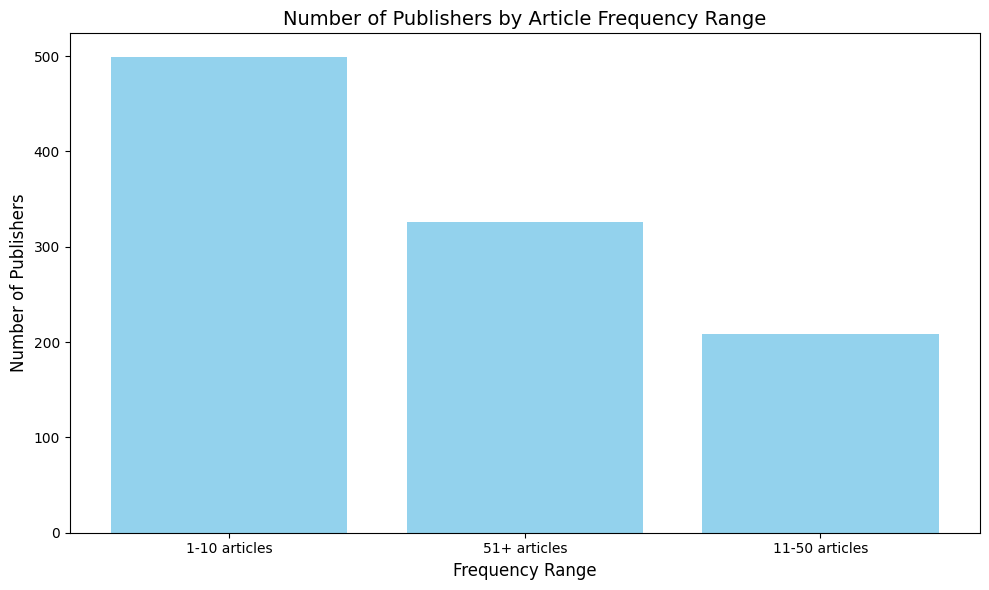

In [15]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("Number of Articles per Publisher:")
print(publisher_counts)

# Visualize publisher activity

bins = [0, 10, 50, float('inf')]
labels = ['1-10 articles', '11-50 articles', '51+ articles']

# Group publishers by frequency range
publisher_groups = pd.cut(publisher_counts, bins=bins, labels=labels, right=False)
grouped_data = publisher_groups.value_counts()

# Plot the grouped data
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data.values, color='skyblue', alpha=0.9)

# Add titles and labels
plt.title('Number of Publishers by Article Frequency Range', fontsize=14)
plt.xlabel('Frequency Range', fontsize=12)
plt.ylabel('Number of Publishers', fontsize=12)
plt.tight_layout()
plt.show()



Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


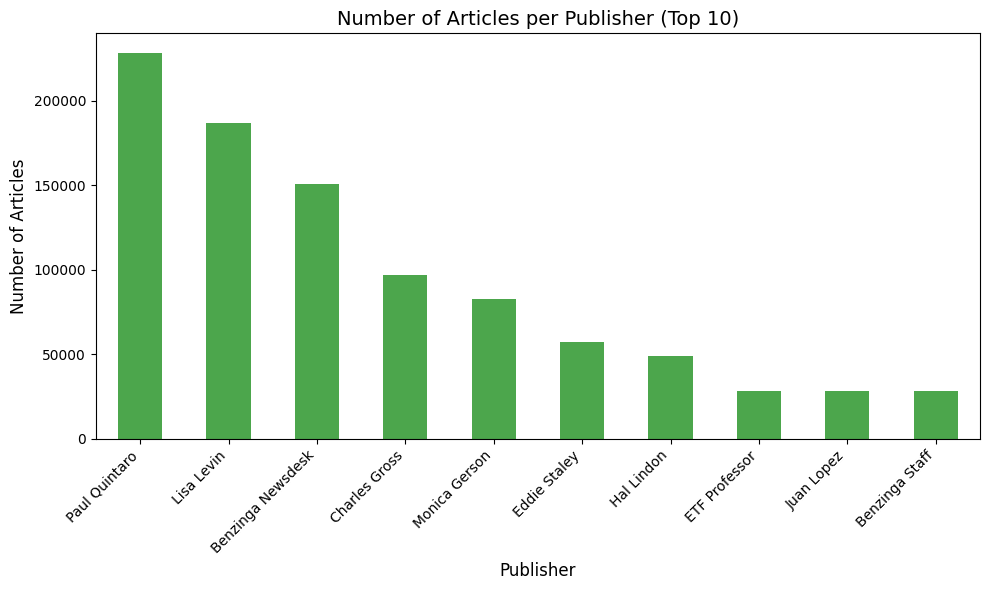

In [17]:
# Count articles by publisher
publisher_counts = df['publisher'].value_counts()

print("Number of Articles per Publisher:")
print(publisher_counts)

# Get the top 10 publishers
top_10_publishers = publisher_counts.head(10)

# Plot the top 10 publishers
plt.figure(figsize=(10, 6))
top_10_publishers.plot(kind='bar', color='green', alpha=0.7)

# Add titles and labels
plt.title('Number of Articles per Publisher (Top 10)', fontsize=14)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha='right')

# Show the plot
plt.tight_layout()
plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_7100\3669237567.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['date'].dt.to_period('M')


Articles Published Per Month:
year_month
2011-04       6
2011-05      78
2011-06      96
2011-07     137
2011-08     149
           ... 
2020-02    2356
2020-03    4680
2020-04    4616
2020-05    9333
2020-06    5990
Freq: M, Name: count, Length: 111, dtype: int64


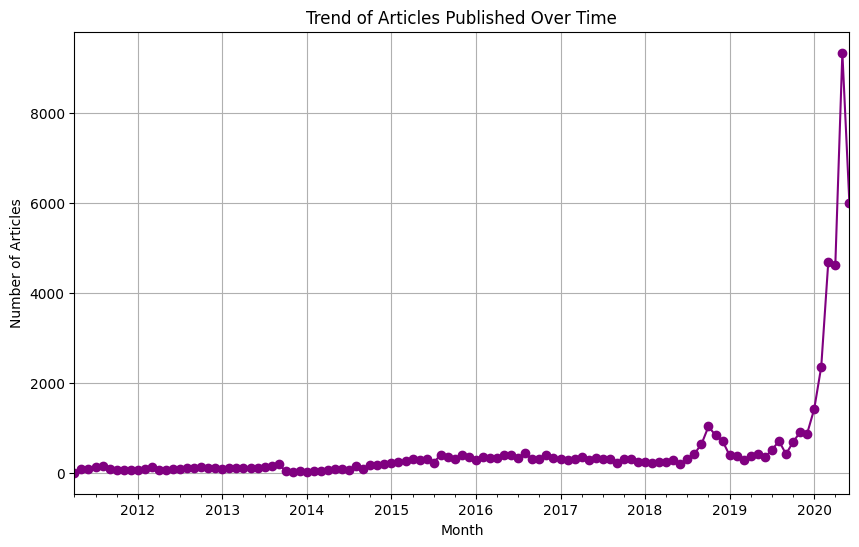

In [20]:
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Extract publication year and month
df['year_month'] = df['date'].dt.to_period('M')

# Count articles per month
articles_per_month = df['year_month'].value_counts().sort_index()

print("Articles Published Per Month:")
print(articles_per_month)

# Visualize publication trends over time
articles_per_month.plot(kind='line', figsize=(10, 6), marker='o', color='purple')
plt.title('Trend of Articles Published Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()


Articles Published by Day of the Week:
day_of_week
Thursday     12688
Wednesday    11891
Tuesday      11002
Monday       10322
Friday        9381
Sunday         436
Saturday       267
Name: count, dtype: int64


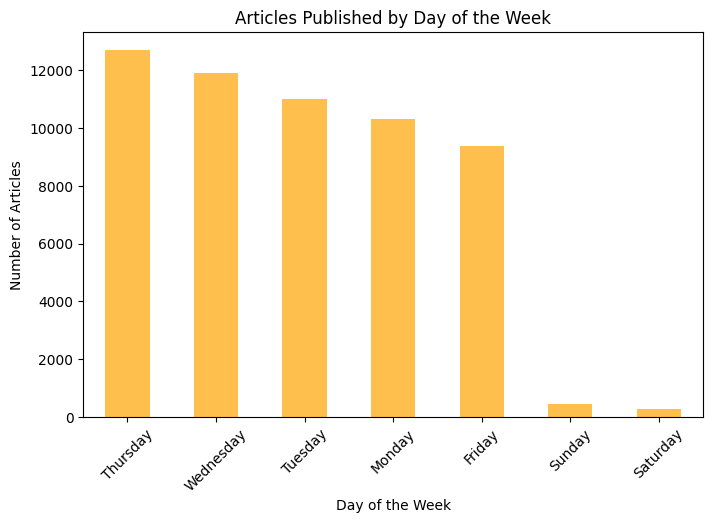

In [21]:
# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Count articles by day of the week
day_counts = df['day_of_week'].value_counts()

print("Articles Published by Day of the Week:")
print(day_counts)

# Visualize articles by day of the week
day_counts.plot(kind='bar', figsize=(8, 5), color='orange', alpha=0.7)
plt.title('Articles Published by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()
